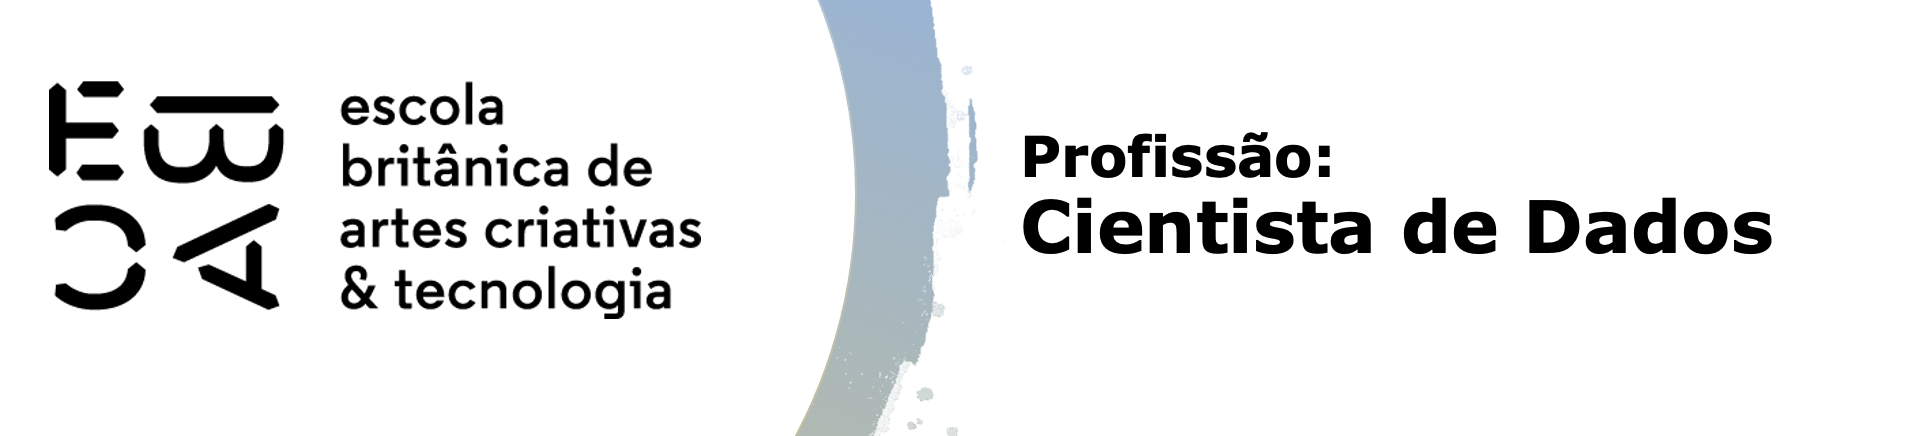

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [80]:
X_train = pd.read_csv('X_train_df.csv')
X_test = pd.read_csv('X_test_df.csv')
y_train = pd.read_csv('./train/y_train.txt', header=None)
y_test = pd.read_csv('./test/y_test.txt', header=None)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [9]:
%%time
melhores = ['angle(X,gravityMean)', 'tGravityAccMag-arCoeff()4', 'tGravityAcc-max()-Z']

X_train = X_train[melhores]

caminho = DecisionTreeClassifier(random_state=19, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = caminho.ccp_alphas
ccp_alphas  = np.unique(ccp_alphas[ccp_alphas>=0])

Wall time: 26.1 ms


array([0.00000000e+00, 6.96674540e-06, 8.99098135e-06, 1.07040728e-05,
       2.80149105e-05, 2.91013994e-05, 4.51599307e-05, 4.83321361e-05,
       5.09851425e-05, 5.16866159e-05, 5.50650542e-05, 6.19446807e-05,
       6.29080522e-05, 7.07988058e-05, 8.84113166e-05, 9.17426569e-05,
       9.23359297e-05, 1.04574424e-04, 1.35037958e-04, 1.35275015e-04,
       1.38284367e-04, 1.38382930e-04, 1.39664739e-04, 1.51345951e-04,
       1.56420022e-04, 1.56684991e-04, 1.61115861e-04, 1.64540944e-04,
       1.70021763e-04, 1.74879527e-04, 1.82263330e-04, 1.84483384e-04,
       1.86483129e-04, 1.98477620e-04, 2.08900736e-04, 2.10304377e-04,
       2.13809231e-04, 2.15642864e-04, 2.16642223e-04, 2.20884487e-04,
       2.25184379e-04, 2.29471549e-04, 2.33220096e-04, 2.42564382e-04,
       2.47304382e-04, 2.52218764e-04, 2.53030019e-04, 2.58433079e-04,
       2.67603700e-04, 2.76213906e-04, 2.78217430e-04, 2.88639543e-04,
       2.89881583e-04, 2.97934442e-04, 3.02086530e-04, 3.03970125e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [10]:
%%time
clf = DecisionTreeClassifier(random_state = 19)

grid_parametros = {'ccp_alpha':ccp_alphas}

grid = GridSearchCV(estimator = clf,  param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
[CV 1/10; 1/168] START ccp_alpha=0.0............................................
[CV 1/10; 1/168] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 2/10; 1/168] START ccp_alpha=0.0............................................
[CV 2/10; 1/168] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 3/10; 1/168] START ccp_alpha=0.0............................................
[CV 3/10; 1/168] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 4/10; 1/168] START ccp_alpha=0.0............................................
[CV 4/10; 1/168] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 5/10; 1/168] START ccp_alpha=0.0............................................
[CV 5/10; 1/168] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 6/10; 1/168] START ccp_alpha=0.0............................................
[CV 6/10; 1/168] END .......................

[CV 7/10; 6/168] END .......ccp_alpha=2.9101399397727366e-05; total time=   0.0s
[CV 8/10; 6/168] START ccp_alpha=2.9101399397727366e-05.........................
[CV 8/10; 6/168] END .......ccp_alpha=2.9101399397727366e-05; total time=   0.0s
[CV 9/10; 6/168] START ccp_alpha=2.9101399397727366e-05.........................
[CV 9/10; 6/168] END .......ccp_alpha=2.9101399397727366e-05; total time=   0.0s
[CV 10/10; 6/168] START ccp_alpha=2.9101399397727366e-05........................
[CV 10/10; 6/168] END ......ccp_alpha=2.9101399397727366e-05; total time=   0.0s
[CV 1/10; 7/168] START ccp_alpha=4.515993066875378e-05..........................
[CV 1/10; 7/168] END ........ccp_alpha=4.515993066875378e-05; total time=   0.0s
[CV 2/10; 7/168] START ccp_alpha=4.515993066875378e-05..........................
[CV 2/10; 7/168] END ........ccp_alpha=4.515993066875378e-05; total time=   0.0s
[CV 3/10; 7/168] START ccp_alpha=4.515993066875378e-05..........................
[CV 3/10; 7/168] END .......

[CV 3/10; 12/168] START ccp_alpha=6.194468068913416e-05.........................
[CV 3/10; 12/168] END .......ccp_alpha=6.194468068913416e-05; total time=   0.0s
[CV 4/10; 12/168] START ccp_alpha=6.194468068913416e-05.........................
[CV 4/10; 12/168] END .......ccp_alpha=6.194468068913416e-05; total time=   0.0s
[CV 5/10; 12/168] START ccp_alpha=6.194468068913416e-05.........................
[CV 5/10; 12/168] END .......ccp_alpha=6.194468068913416e-05; total time=   0.0s
[CV 6/10; 12/168] START ccp_alpha=6.194468068913416e-05.........................
[CV 6/10; 12/168] END .......ccp_alpha=6.194468068913416e-05; total time=   0.0s
[CV 7/10; 12/168] START ccp_alpha=6.194468068913416e-05.........................
[CV 7/10; 12/168] END .......ccp_alpha=6.194468068913416e-05; total time=   0.0s
[CV 8/10; 12/168] START ccp_alpha=6.194468068913416e-05.........................
[CV 8/10; 12/168] END .......ccp_alpha=6.194468068913416e-05; total time=   0.0s
[CV 9/10; 12/168] START ccp_

[CV 4/10; 17/168] END .......ccp_alpha=9.233592967093423e-05; total time=   0.0s
[CV 5/10; 17/168] START ccp_alpha=9.233592967093423e-05.........................
[CV 5/10; 17/168] END .......ccp_alpha=9.233592967093423e-05; total time=   0.0s
[CV 6/10; 17/168] START ccp_alpha=9.233592967093423e-05.........................
[CV 6/10; 17/168] END .......ccp_alpha=9.233592967093423e-05; total time=   0.0s
[CV 7/10; 17/168] START ccp_alpha=9.233592967093423e-05.........................
[CV 7/10; 17/168] END .......ccp_alpha=9.233592967093423e-05; total time=   0.0s
[CV 8/10; 17/168] START ccp_alpha=9.233592967093423e-05.........................
[CV 8/10; 17/168] END .......ccp_alpha=9.233592967093423e-05; total time=   0.0s
[CV 9/10; 17/168] START ccp_alpha=9.233592967093423e-05.........................
[CV 9/10; 17/168] END .......ccp_alpha=9.233592967093423e-05; total time=   0.0s
[CV 10/10; 17/168] START ccp_alpha=9.233592967093423e-05........................
[CV 10/10; 17/168] END .....

[CV 9/10; 22/168] END .......ccp_alpha=0.0001383829304063965; total time=   0.0s
[CV 10/10; 22/168] START ccp_alpha=0.0001383829304063965........................
[CV 10/10; 22/168] END ......ccp_alpha=0.0001383829304063965; total time=   0.0s
[CV 1/10; 23/168] START ccp_alpha=0.0001396647393697827.........................
[CV 1/10; 23/168] END .......ccp_alpha=0.0001396647393697827; total time=   0.0s
[CV 2/10; 23/168] START ccp_alpha=0.0001396647393697827.........................
[CV 2/10; 23/168] END .......ccp_alpha=0.0001396647393697827; total time=   0.0s
[CV 3/10; 23/168] START ccp_alpha=0.0001396647393697827.........................
[CV 3/10; 23/168] END .......ccp_alpha=0.0001396647393697827; total time=   0.0s
[CV 4/10; 23/168] START ccp_alpha=0.0001396647393697827.........................
[CV 4/10; 23/168] END .......ccp_alpha=0.0001396647393697827; total time=   0.0s
[CV 5/10; 23/168] START ccp_alpha=0.0001396647393697827.........................
[CV 5/10; 23/168] END ......

[CV 5/10; 28/168] START ccp_alpha=0.00016454094445844843........................
[CV 5/10; 28/168] END ......ccp_alpha=0.00016454094445844843; total time=   0.0s
[CV 6/10; 28/168] START ccp_alpha=0.00016454094445844843........................
[CV 6/10; 28/168] END ......ccp_alpha=0.00016454094445844843; total time=   0.0s
[CV 7/10; 28/168] START ccp_alpha=0.00016454094445844843........................
[CV 7/10; 28/168] END ......ccp_alpha=0.00016454094445844843; total time=   0.0s
[CV 8/10; 28/168] START ccp_alpha=0.00016454094445844843........................
[CV 8/10; 28/168] END ......ccp_alpha=0.00016454094445844843; total time=   0.0s
[CV 9/10; 28/168] START ccp_alpha=0.00016454094445844843........................
[CV 9/10; 28/168] END ......ccp_alpha=0.00016454094445844843; total time=   0.0s
[CV 10/10; 28/168] START ccp_alpha=0.00016454094445844843.......................
[CV 10/10; 28/168] END .....ccp_alpha=0.00016454094445844843; total time=   0.0s
[CV 1/10; 29/168] START ccp_

[CV 6/10; 33/168] END ......ccp_alpha=0.00018648312909978326; total time=   0.0s
[CV 7/10; 33/168] START ccp_alpha=0.00018648312909978326........................
[CV 7/10; 33/168] END ......ccp_alpha=0.00018648312909978326; total time=   0.0s
[CV 8/10; 33/168] START ccp_alpha=0.00018648312909978326........................
[CV 8/10; 33/168] END ......ccp_alpha=0.00018648312909978326; total time=   0.0s
[CV 9/10; 33/168] START ccp_alpha=0.00018648312909978326........................
[CV 9/10; 33/168] END ......ccp_alpha=0.00018648312909978326; total time=   0.0s
[CV 10/10; 33/168] START ccp_alpha=0.00018648312909978326.......................
[CV 10/10; 33/168] END .....ccp_alpha=0.00018648312909978326; total time=   0.0s
[CV 1/10; 34/168] START ccp_alpha=0.00019847761958752133........................
[CV 1/10; 34/168] END ......ccp_alpha=0.00019847761958752133; total time=   0.0s
[CV 2/10; 34/168] START ccp_alpha=0.00019847761958752133........................
[CV 2/10; 34/168] END ......

[CV 1/10; 39/168] END ......ccp_alpha=0.00021664222295816275; total time=   0.0s
[CV 2/10; 39/168] START ccp_alpha=0.00021664222295816275........................
[CV 2/10; 39/168] END ......ccp_alpha=0.00021664222295816275; total time=   0.0s
[CV 3/10; 39/168] START ccp_alpha=0.00021664222295816275........................
[CV 3/10; 39/168] END ......ccp_alpha=0.00021664222295816275; total time=   0.0s
[CV 4/10; 39/168] START ccp_alpha=0.00021664222295816275........................
[CV 4/10; 39/168] END ......ccp_alpha=0.00021664222295816275; total time=   0.0s
[CV 5/10; 39/168] START ccp_alpha=0.00021664222295816275........................
[CV 5/10; 39/168] END ......ccp_alpha=0.00021664222295816275; total time=   0.0s
[CV 6/10; 39/168] START ccp_alpha=0.00021664222295816275........................
[CV 6/10; 39/168] END ......ccp_alpha=0.00021664222295816275; total time=   0.0s
[CV 7/10; 39/168] START ccp_alpha=0.00021664222295816275........................
[CV 7/10; 39/168] END ......

[CV 5/10; 44/168] END ......ccp_alpha=0.00024256438157417397; total time=   0.0s
[CV 6/10; 44/168] START ccp_alpha=0.00024256438157417397........................
[CV 6/10; 44/168] END ......ccp_alpha=0.00024256438157417397; total time=   0.0s
[CV 7/10; 44/168] START ccp_alpha=0.00024256438157417397........................
[CV 7/10; 44/168] END ......ccp_alpha=0.00024256438157417397; total time=   0.0s
[CV 8/10; 44/168] START ccp_alpha=0.00024256438157417397........................
[CV 8/10; 44/168] END ......ccp_alpha=0.00024256438157417397; total time=   0.0s
[CV 9/10; 44/168] START ccp_alpha=0.00024256438157417397........................
[CV 9/10; 44/168] END ......ccp_alpha=0.00024256438157417397; total time=   0.0s
[CV 10/10; 44/168] START ccp_alpha=0.00024256438157417397.......................
[CV 10/10; 44/168] END .....ccp_alpha=0.00024256438157417397; total time=   0.0s
[CV 1/10; 45/168] START ccp_alpha=0.000247304382233653..........................
[CV 1/10; 45/168] END ......

[CV 1/10; 50/168] END ......ccp_alpha=0.00027621390610461883; total time=   0.0s
[CV 2/10; 50/168] START ccp_alpha=0.00027621390610461883........................
[CV 2/10; 50/168] END ......ccp_alpha=0.00027621390610461883; total time=   0.0s
[CV 3/10; 50/168] START ccp_alpha=0.00027621390610461883........................
[CV 3/10; 50/168] END ......ccp_alpha=0.00027621390610461883; total time=   0.0s
[CV 4/10; 50/168] START ccp_alpha=0.00027621390610461883........................
[CV 4/10; 50/168] END ......ccp_alpha=0.00027621390610461883; total time=   0.0s
[CV 5/10; 50/168] START ccp_alpha=0.00027621390610461883........................
[CV 5/10; 50/168] END ......ccp_alpha=0.00027621390610461883; total time=   0.0s
[CV 6/10; 50/168] START ccp_alpha=0.00027621390610461883........................
[CV 6/10; 50/168] END ......ccp_alpha=0.00027621390610461883; total time=   0.0s
[CV 7/10; 50/168] START ccp_alpha=0.00027621390610461883........................
[CV 7/10; 50/168] END ......

[CV 9/10; 55/168] END ........ccp_alpha=0.000302086530323745; total time=   0.0s
[CV 10/10; 55/168] START ccp_alpha=0.000302086530323745.........................
[CV 10/10; 55/168] END .......ccp_alpha=0.000302086530323745; total time=   0.0s
[CV 1/10; 56/168] START ccp_alpha=0.00030397012510723076........................
[CV 1/10; 56/168] END ......ccp_alpha=0.00030397012510723076; total time=   0.0s
[CV 2/10; 56/168] START ccp_alpha=0.00030397012510723076........................
[CV 2/10; 56/168] END ......ccp_alpha=0.00030397012510723076; total time=   0.0s
[CV 3/10; 56/168] START ccp_alpha=0.00030397012510723076........................
[CV 3/10; 56/168] END ......ccp_alpha=0.00030397012510723076; total time=   0.0s
[CV 4/10; 56/168] START ccp_alpha=0.00030397012510723076........................
[CV 4/10; 56/168] END ......ccp_alpha=0.00030397012510723076; total time=   0.0s
[CV 5/10; 56/168] START ccp_alpha=0.00030397012510723076........................
[CV 5/10; 56/168] END ......

[CV 10/10; 60/168] END .....ccp_alpha=0.00035391779692427183; total time=   0.0s
[CV 1/10; 61/168] START ccp_alpha=0.00036740073505559055........................
[CV 1/10; 61/168] END ......ccp_alpha=0.00036740073505559055; total time=   0.0s
[CV 2/10; 61/168] START ccp_alpha=0.00036740073505559055........................
[CV 2/10; 61/168] END ......ccp_alpha=0.00036740073505559055; total time=   0.0s
[CV 3/10; 61/168] START ccp_alpha=0.00036740073505559055........................
[CV 3/10; 61/168] END ......ccp_alpha=0.00036740073505559055; total time=   0.0s
[CV 4/10; 61/168] START ccp_alpha=0.00036740073505559055........................
[CV 4/10; 61/168] END ......ccp_alpha=0.00036740073505559055; total time=   0.0s
[CV 5/10; 61/168] START ccp_alpha=0.00036740073505559055........................
[CV 5/10; 61/168] END ......ccp_alpha=0.00036740073505559055; total time=   0.0s
[CV 6/10; 61/168] START ccp_alpha=0.00036740073505559055........................
[CV 6/10; 61/168] END ......

[CV 2/10; 66/168] END ......ccp_alpha=0.00042230423038008575; total time=   0.0s
[CV 3/10; 66/168] START ccp_alpha=0.00042230423038008575........................
[CV 3/10; 66/168] END ......ccp_alpha=0.00042230423038008575; total time=   0.0s
[CV 4/10; 66/168] START ccp_alpha=0.00042230423038008575........................
[CV 4/10; 66/168] END ......ccp_alpha=0.00042230423038008575; total time=   0.0s
[CV 5/10; 66/168] START ccp_alpha=0.00042230423038008575........................
[CV 5/10; 66/168] END ......ccp_alpha=0.00042230423038008575; total time=   0.0s
[CV 6/10; 66/168] START ccp_alpha=0.00042230423038008575........................
[CV 6/10; 66/168] END ......ccp_alpha=0.00042230423038008575; total time=   0.0s
[CV 7/10; 66/168] START ccp_alpha=0.00042230423038008575........................
[CV 7/10; 66/168] END ......ccp_alpha=0.00042230423038008575; total time=   0.0s
[CV 8/10; 66/168] START ccp_alpha=0.00042230423038008575........................
[CV 8/10; 66/168] END ......

[CV 9/10; 71/168] END ......ccp_alpha=0.00047797154825115346; total time=   0.0s
[CV 10/10; 71/168] START ccp_alpha=0.00047797154825115346.......................
[CV 10/10; 71/168] END .....ccp_alpha=0.00047797154825115346; total time=   0.0s
[CV 1/10; 72/168] START ccp_alpha=0.00048286255823010247........................
[CV 1/10; 72/168] END ......ccp_alpha=0.00048286255823010247; total time=   0.0s
[CV 2/10; 72/168] START ccp_alpha=0.00048286255823010247........................
[CV 2/10; 72/168] END ......ccp_alpha=0.00048286255823010247; total time=   0.0s
[CV 3/10; 72/168] START ccp_alpha=0.00048286255823010247........................
[CV 3/10; 72/168] END ......ccp_alpha=0.00048286255823010247; total time=   0.0s
[CV 4/10; 72/168] START ccp_alpha=0.00048286255823010247........................
[CV 4/10; 72/168] END ......ccp_alpha=0.00048286255823010247; total time=   0.0s
[CV 5/10; 72/168] START ccp_alpha=0.00048286255823010247........................
[CV 5/10; 72/168] END ......

[CV 5/10; 77/168] END .......ccp_alpha=0.0005226843091744975; total time=   0.0s
[CV 6/10; 77/168] START ccp_alpha=0.0005226843091744975.........................
[CV 6/10; 77/168] END .......ccp_alpha=0.0005226843091744975; total time=   0.0s
[CV 7/10; 77/168] START ccp_alpha=0.0005226843091744975.........................
[CV 7/10; 77/168] END .......ccp_alpha=0.0005226843091744975; total time=   0.0s
[CV 8/10; 77/168] START ccp_alpha=0.0005226843091744975.........................
[CV 8/10; 77/168] END .......ccp_alpha=0.0005226843091744975; total time=   0.0s
[CV 9/10; 77/168] START ccp_alpha=0.0005226843091744975.........................
[CV 9/10; 77/168] END .......ccp_alpha=0.0005226843091744975; total time=   0.0s
[CV 10/10; 77/168] START ccp_alpha=0.0005226843091744975........................
[CV 10/10; 77/168] END ......ccp_alpha=0.0005226843091744975; total time=   0.0s
[CV 1/10; 78/168] START ccp_alpha=0.0005327847098375001.........................
[CV 1/10; 78/168] END ......

[CV 1/10; 83/168] END .......ccp_alpha=0.0005761092975456418; total time=   0.0s
[CV 2/10; 83/168] START ccp_alpha=0.0005761092975456418.........................
[CV 2/10; 83/168] END .......ccp_alpha=0.0005761092975456418; total time=   0.0s
[CV 3/10; 83/168] START ccp_alpha=0.0005761092975456418.........................
[CV 3/10; 83/168] END .......ccp_alpha=0.0005761092975456418; total time=   0.0s
[CV 4/10; 83/168] START ccp_alpha=0.0005761092975456418.........................
[CV 4/10; 83/168] END .......ccp_alpha=0.0005761092975456418; total time=   0.0s
[CV 5/10; 83/168] START ccp_alpha=0.0005761092975456418.........................
[CV 5/10; 83/168] END .......ccp_alpha=0.0005761092975456418; total time=   0.0s
[CV 6/10; 83/168] START ccp_alpha=0.0005761092975456418.........................
[CV 6/10; 83/168] END .......ccp_alpha=0.0005761092975456418; total time=   0.0s
[CV 7/10; 83/168] START ccp_alpha=0.0005761092975456418.........................
[CV 7/10; 83/168] END ......

[CV 3/10; 88/168] END .......ccp_alpha=0.0005971426913948196; total time=   0.0s
[CV 4/10; 88/168] START ccp_alpha=0.0005971426913948196.........................
[CV 4/10; 88/168] END .......ccp_alpha=0.0005971426913948196; total time=   0.0s
[CV 5/10; 88/168] START ccp_alpha=0.0005971426913948196.........................
[CV 5/10; 88/168] END .......ccp_alpha=0.0005971426913948196; total time=   0.0s
[CV 6/10; 88/168] START ccp_alpha=0.0005971426913948196.........................
[CV 6/10; 88/168] END .......ccp_alpha=0.0005971426913948196; total time=   0.0s
[CV 7/10; 88/168] START ccp_alpha=0.0005971426913948196.........................
[CV 7/10; 88/168] END .......ccp_alpha=0.0005971426913948196; total time=   0.0s
[CV 8/10; 88/168] START ccp_alpha=0.0005971426913948196.........................
[CV 8/10; 88/168] END .......ccp_alpha=0.0005971426913948196; total time=   0.0s
[CV 9/10; 88/168] START ccp_alpha=0.0005971426913948196.........................
[CV 9/10; 88/168] END ......

[CV 4/10; 93/168] END .......ccp_alpha=0.0006348282277101173; total time=   0.0s
[CV 5/10; 93/168] START ccp_alpha=0.0006348282277101173.........................
[CV 5/10; 93/168] END .......ccp_alpha=0.0006348282277101173; total time=   0.0s
[CV 6/10; 93/168] START ccp_alpha=0.0006348282277101173.........................
[CV 6/10; 93/168] END .......ccp_alpha=0.0006348282277101173; total time=   0.0s
[CV 7/10; 93/168] START ccp_alpha=0.0006348282277101173.........................
[CV 7/10; 93/168] END .......ccp_alpha=0.0006348282277101173; total time=   0.0s
[CV 8/10; 93/168] START ccp_alpha=0.0006348282277101173.........................
[CV 8/10; 93/168] END .......ccp_alpha=0.0006348282277101173; total time=   0.0s
[CV 9/10; 93/168] START ccp_alpha=0.0006348282277101173.........................
[CV 9/10; 93/168] END .......ccp_alpha=0.0006348282277101173; total time=   0.0s
[CV 10/10; 93/168] START ccp_alpha=0.0006348282277101173........................
[CV 10/10; 93/168] END .....

[CV 10/10; 98/168] END ......ccp_alpha=0.0006898920866455568; total time=   0.0s
[CV 1/10; 99/168] START ccp_alpha=0.0006940262104342803.........................
[CV 1/10; 99/168] END .......ccp_alpha=0.0006940262104342803; total time=   0.0s
[CV 2/10; 99/168] START ccp_alpha=0.0006940262104342803.........................
[CV 2/10; 99/168] END .......ccp_alpha=0.0006940262104342803; total time=   0.0s
[CV 3/10; 99/168] START ccp_alpha=0.0006940262104342803.........................
[CV 3/10; 99/168] END .......ccp_alpha=0.0006940262104342803; total time=   0.0s
[CV 4/10; 99/168] START ccp_alpha=0.0006940262104342803.........................
[CV 4/10; 99/168] END .......ccp_alpha=0.0006940262104342803; total time=   0.0s
[CV 5/10; 99/168] START ccp_alpha=0.0006940262104342803.........................
[CV 5/10; 99/168] END .......ccp_alpha=0.0006940262104342803; total time=   0.0s
[CV 6/10; 99/168] START ccp_alpha=0.0006940262104342803.........................
[CV 6/10; 99/168] END ......

[CV 2/10; 104/168] END ......ccp_alpha=0.0007635610498053485; total time=   0.0s
[CV 3/10; 104/168] START ccp_alpha=0.0007635610498053485........................
[CV 3/10; 104/168] END ......ccp_alpha=0.0007635610498053485; total time=   0.0s
[CV 4/10; 104/168] START ccp_alpha=0.0007635610498053485........................
[CV 4/10; 104/168] END ......ccp_alpha=0.0007635610498053485; total time=   0.0s
[CV 5/10; 104/168] START ccp_alpha=0.0007635610498053485........................
[CV 5/10; 104/168] END ......ccp_alpha=0.0007635610498053485; total time=   0.0s
[CV 6/10; 104/168] START ccp_alpha=0.0007635610498053485........................
[CV 6/10; 104/168] END ......ccp_alpha=0.0007635610498053485; total time=   0.0s
[CV 7/10; 104/168] START ccp_alpha=0.0007635610498053485........................
[CV 7/10; 104/168] END ......ccp_alpha=0.0007635610498053485; total time=   0.0s
[CV 8/10; 104/168] START ccp_alpha=0.0007635610498053485........................
[CV 8/10; 104/168] END .....

[CV 3/10; 109/168] END ......ccp_alpha=0.0008975643554144114; total time=   0.0s
[CV 4/10; 109/168] START ccp_alpha=0.0008975643554144114........................
[CV 4/10; 109/168] END ......ccp_alpha=0.0008975643554144114; total time=   0.0s
[CV 5/10; 109/168] START ccp_alpha=0.0008975643554144114........................
[CV 5/10; 109/168] END ......ccp_alpha=0.0008975643554144114; total time=   0.0s
[CV 6/10; 109/168] START ccp_alpha=0.0008975643554144114........................
[CV 6/10; 109/168] END ......ccp_alpha=0.0008975643554144114; total time=   0.0s
[CV 7/10; 109/168] START ccp_alpha=0.0008975643554144114........................
[CV 7/10; 109/168] END ......ccp_alpha=0.0008975643554144114; total time=   0.0s
[CV 8/10; 109/168] START ccp_alpha=0.0008975643554144114........................
[CV 8/10; 109/168] END ......ccp_alpha=0.0008975643554144114; total time=   0.0s
[CV 9/10; 109/168] START ccp_alpha=0.0008975643554144114........................
[CV 9/10; 109/168] END .....

[CV 8/10; 114/168] END .......ccp_alpha=0.001027216247513783; total time=   0.0s
[CV 9/10; 114/168] START ccp_alpha=0.001027216247513783.........................
[CV 9/10; 114/168] END .......ccp_alpha=0.001027216247513783; total time=   0.0s
[CV 10/10; 114/168] START ccp_alpha=0.001027216247513783........................
[CV 10/10; 114/168] END ......ccp_alpha=0.001027216247513783; total time=   0.0s
[CV 1/10; 115/168] START ccp_alpha=0.0010488319220723291........................
[CV 1/10; 115/168] END ......ccp_alpha=0.0010488319220723291; total time=   0.0s
[CV 2/10; 115/168] START ccp_alpha=0.0010488319220723291........................
[CV 2/10; 115/168] END ......ccp_alpha=0.0010488319220723291; total time=   0.0s
[CV 3/10; 115/168] START ccp_alpha=0.0010488319220723291........................
[CV 3/10; 115/168] END ......ccp_alpha=0.0010488319220723291; total time=   0.0s
[CV 4/10; 115/168] START ccp_alpha=0.0010488319220723291........................
[CV 4/10; 115/168] END .....

[CV 4/10; 120/168] END .......ccp_alpha=0.001160013883841199; total time=   0.0s
[CV 5/10; 120/168] START ccp_alpha=0.001160013883841199.........................
[CV 5/10; 120/168] END .......ccp_alpha=0.001160013883841199; total time=   0.0s
[CV 6/10; 120/168] START ccp_alpha=0.001160013883841199.........................
[CV 6/10; 120/168] END .......ccp_alpha=0.001160013883841199; total time=   0.0s
[CV 7/10; 120/168] START ccp_alpha=0.001160013883841199.........................
[CV 7/10; 120/168] END .......ccp_alpha=0.001160013883841199; total time=   0.0s
[CV 8/10; 120/168] START ccp_alpha=0.001160013883841199.........................
[CV 8/10; 120/168] END .......ccp_alpha=0.001160013883841199; total time=   0.0s
[CV 9/10; 120/168] START ccp_alpha=0.001160013883841199.........................
[CV 9/10; 120/168] END .......ccp_alpha=0.001160013883841199; total time=   0.0s
[CV 10/10; 120/168] START ccp_alpha=0.001160013883841199........................
[CV 10/10; 120/168] END ....

[CV 7/10; 125/168] END ......ccp_alpha=0.0012022896742984249; total time=   0.0s
[CV 8/10; 125/168] START ccp_alpha=0.0012022896742984249........................
[CV 8/10; 125/168] END ......ccp_alpha=0.0012022896742984249; total time=   0.0s
[CV 9/10; 125/168] START ccp_alpha=0.0012022896742984249........................
[CV 9/10; 125/168] END ......ccp_alpha=0.0012022896742984249; total time=   0.0s
[CV 10/10; 125/168] START ccp_alpha=0.0012022896742984249.......................
[CV 10/10; 125/168] END .....ccp_alpha=0.0012022896742984249; total time=   0.0s
[CV 1/10; 126/168] START ccp_alpha=0.0013799154554814397........................
[CV 1/10; 126/168] END ......ccp_alpha=0.0013799154554814397; total time=   0.0s
[CV 2/10; 126/168] START ccp_alpha=0.0013799154554814397........................
[CV 2/10; 126/168] END ......ccp_alpha=0.0013799154554814397; total time=   0.0s
[CV 3/10; 126/168] START ccp_alpha=0.0013799154554814397........................
[CV 3/10; 126/168] END .....

[CV 8/10; 130/168] END ......ccp_alpha=0.0015517599257013556; total time=   0.0s
[CV 9/10; 130/168] START ccp_alpha=0.0015517599257013556........................
[CV 9/10; 130/168] END ......ccp_alpha=0.0015517599257013556; total time=   0.0s
[CV 10/10; 130/168] START ccp_alpha=0.0015517599257013556.......................
[CV 10/10; 130/168] END .....ccp_alpha=0.0015517599257013556; total time=   0.0s
[CV 1/10; 131/168] START ccp_alpha=0.0015677861705083382........................
[CV 1/10; 131/168] END ......ccp_alpha=0.0015677861705083382; total time=   0.0s
[CV 2/10; 131/168] START ccp_alpha=0.0015677861705083382........................
[CV 2/10; 131/168] END ......ccp_alpha=0.0015677861705083382; total time=   0.0s
[CV 3/10; 131/168] START ccp_alpha=0.0015677861705083382........................
[CV 3/10; 131/168] END ......ccp_alpha=0.0015677861705083382; total time=   0.0s
[CV 4/10; 131/168] START ccp_alpha=0.0015677861705083382........................
[CV 4/10; 131/168] END .....

[CV 10/10; 135/168] END .....ccp_alpha=0.0016116779928962988; total time=   0.0s
[CV 1/10; 136/168] START ccp_alpha=0.0016273928412924507........................
[CV 1/10; 136/168] END ......ccp_alpha=0.0016273928412924507; total time=   0.0s
[CV 2/10; 136/168] START ccp_alpha=0.0016273928412924507........................
[CV 2/10; 136/168] END ......ccp_alpha=0.0016273928412924507; total time=   0.0s
[CV 3/10; 136/168] START ccp_alpha=0.0016273928412924507........................
[CV 3/10; 136/168] END ......ccp_alpha=0.0016273928412924507; total time=   0.0s
[CV 4/10; 136/168] START ccp_alpha=0.0016273928412924507........................
[CV 4/10; 136/168] END ......ccp_alpha=0.0016273928412924507; total time=   0.0s
[CV 5/10; 136/168] START ccp_alpha=0.0016273928412924507........................
[CV 5/10; 136/168] END ......ccp_alpha=0.0016273928412924507; total time=   0.0s
[CV 6/10; 136/168] START ccp_alpha=0.0016273928412924507........................
[CV 6/10; 136/168] END .....

[CV 2/10; 141/168] END .......ccp_alpha=0.002040039110834467; total time=   0.0s
[CV 3/10; 141/168] START ccp_alpha=0.002040039110834467.........................
[CV 3/10; 141/168] END .......ccp_alpha=0.002040039110834467; total time=   0.0s
[CV 4/10; 141/168] START ccp_alpha=0.002040039110834467.........................
[CV 4/10; 141/168] END .......ccp_alpha=0.002040039110834467; total time=   0.0s
[CV 5/10; 141/168] START ccp_alpha=0.002040039110834467.........................
[CV 5/10; 141/168] END .......ccp_alpha=0.002040039110834467; total time=   0.0s
[CV 6/10; 141/168] START ccp_alpha=0.002040039110834467.........................
[CV 6/10; 141/168] END .......ccp_alpha=0.002040039110834467; total time=   0.0s
[CV 7/10; 141/168] START ccp_alpha=0.002040039110834467.........................
[CV 7/10; 141/168] END .......ccp_alpha=0.002040039110834467; total time=   0.0s
[CV 8/10; 141/168] START ccp_alpha=0.002040039110834467.........................
[CV 8/10; 141/168] END .....

[CV 4/10; 146/168] END ........ccp_alpha=0.00236449349378595; total time=   0.0s
[CV 5/10; 146/168] START ccp_alpha=0.00236449349378595..........................
[CV 5/10; 146/168] END ........ccp_alpha=0.00236449349378595; total time=   0.0s
[CV 6/10; 146/168] START ccp_alpha=0.00236449349378595..........................
[CV 6/10; 146/168] END ........ccp_alpha=0.00236449349378595; total time=   0.0s
[CV 7/10; 146/168] START ccp_alpha=0.00236449349378595..........................
[CV 7/10; 146/168] END ........ccp_alpha=0.00236449349378595; total time=   0.0s
[CV 8/10; 146/168] START ccp_alpha=0.00236449349378595..........................
[CV 8/10; 146/168] END ........ccp_alpha=0.00236449349378595; total time=   0.0s
[CV 9/10; 146/168] START ccp_alpha=0.00236449349378595..........................
[CV 9/10; 146/168] END ........ccp_alpha=0.00236449349378595; total time=   0.0s
[CV 10/10; 146/168] START ccp_alpha=0.00236449349378595.........................
[CV 10/10; 146/168] END ....

[CV 7/10; 151/168] END ......ccp_alpha=0.0028473905234953772; total time=   0.0s
[CV 8/10; 151/168] START ccp_alpha=0.0028473905234953772........................
[CV 8/10; 151/168] END ......ccp_alpha=0.0028473905234953772; total time=   0.0s
[CV 9/10; 151/168] START ccp_alpha=0.0028473905234953772........................
[CV 9/10; 151/168] END ......ccp_alpha=0.0028473905234953772; total time=   0.0s
[CV 10/10; 151/168] START ccp_alpha=0.0028473905234953772.......................
[CV 10/10; 151/168] END .....ccp_alpha=0.0028473905234953772; total time=   0.0s
[CV 1/10; 152/168] START ccp_alpha=0.002898528253881816.........................
[CV 1/10; 152/168] END .......ccp_alpha=0.002898528253881816; total time=   0.0s
[CV 2/10; 152/168] START ccp_alpha=0.002898528253881816.........................
[CV 2/10; 152/168] END .......ccp_alpha=0.002898528253881816; total time=   0.0s
[CV 3/10; 152/168] START ccp_alpha=0.002898528253881816.........................
[CV 3/10; 152/168] END .....

[CV 9/10; 156/168] START ccp_alpha=0.0034992510407012983........................
[CV 9/10; 156/168] END ......ccp_alpha=0.0034992510407012983; total time=   0.0s
[CV 10/10; 156/168] START ccp_alpha=0.0034992510407012983.......................
[CV 10/10; 156/168] END .....ccp_alpha=0.0034992510407012983; total time=   0.0s
[CV 1/10; 157/168] START ccp_alpha=0.003680496995083736.........................
[CV 1/10; 157/168] END .......ccp_alpha=0.003680496995083736; total time=   0.0s
[CV 2/10; 157/168] START ccp_alpha=0.003680496995083736.........................
[CV 2/10; 157/168] END .......ccp_alpha=0.003680496995083736; total time=   0.0s
[CV 3/10; 157/168] START ccp_alpha=0.003680496995083736.........................
[CV 3/10; 157/168] END .......ccp_alpha=0.003680496995083736; total time=   0.0s
[CV 4/10; 157/168] START ccp_alpha=0.003680496995083736.........................
[CV 4/10; 157/168] END .......ccp_alpha=0.003680496995083736; total time=   0.0s
[CV 5/10; 157/168] START ccp

[CV 4/10; 162/168] END ......ccp_alpha=0.0066178379183326475; total time=   0.0s
[CV 5/10; 162/168] START ccp_alpha=0.0066178379183326475........................
[CV 5/10; 162/168] END ......ccp_alpha=0.0066178379183326475; total time=   0.0s
[CV 6/10; 162/168] START ccp_alpha=0.0066178379183326475........................
[CV 6/10; 162/168] END ......ccp_alpha=0.0066178379183326475; total time=   0.0s
[CV 7/10; 162/168] START ccp_alpha=0.0066178379183326475........................
[CV 7/10; 162/168] END ......ccp_alpha=0.0066178379183326475; total time=   0.0s
[CV 8/10; 162/168] START ccp_alpha=0.0066178379183326475........................
[CV 8/10; 162/168] END ......ccp_alpha=0.0066178379183326475; total time=   0.0s
[CV 9/10; 162/168] START ccp_alpha=0.0066178379183326475........................
[CV 9/10; 162/168] END ......ccp_alpha=0.0066178379183326475; total time=   0.0s
[CV 10/10; 162/168] START ccp_alpha=0.0066178379183326475.......................
[CV 10/10; 162/168] END ....

[CV 5/10; 167/168] END ........ccp_alpha=0.05592085927752122; total time=   0.0s
[CV 6/10; 167/168] START ccp_alpha=0.05592085927752122..........................
[CV 6/10; 167/168] END ........ccp_alpha=0.05592085927752122; total time=   0.0s
[CV 7/10; 167/168] START ccp_alpha=0.05592085927752122..........................
[CV 7/10; 167/168] END ........ccp_alpha=0.05592085927752122; total time=   0.0s
[CV 8/10; 167/168] START ccp_alpha=0.05592085927752122..........................
[CV 8/10; 167/168] END ........ccp_alpha=0.05592085927752122; total time=   0.0s
[CV 9/10; 167/168] START ccp_alpha=0.05592085927752122..........................
[CV 9/10; 167/168] END ........ccp_alpha=0.05592085927752122; total time=   0.0s
[CV 10/10; 167/168] START ccp_alpha=0.05592085927752122.........................
[CV 10/10; 167/168] END .......ccp_alpha=0.05592085927752122; total time=   0.0s
[CV 1/10; 168/168] START ccp_alpha=0.18581114284436406..........................
[CV 1/10; 168/168] END .....

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=19),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.96674540e-06, 8.99098135e-06, 1.07040728e-05,
       2.80149105e-05, 2.91013994e-05, 4.51599307e-05, 4.83321361e-05,
       5.09851425e-05, 5.16866159e-05, 5.50650542e-05, 6.19446807e-05,
       6.29080522e-05, 7.07988058e-05, 8.84113166e-05, 9.17426569e-05,
       9.23359297...
       2.29506466e-03, 2.36449349e-03, 2.42228909e-03, 2.49846170e-03,
       2.52067793e-03, 2.76885977e-03, 2.84739052e-03, 2.89852825e-03,
       2.95167023e-03, 3.15319218e-03, 3.48749197e-03, 3.49925104e-03,
       3.68049700e-03, 3.92682656e-03, 4.48167236e-03, 5.12636781e-03,
       5.41101083e-03, 6.61783792e-03, 8.34519727e-03, 9.31483525e-03,
       1.29868672e-02, 2.66312422e-02, 5.59208593e-02, 1.85811143e-01])},
             verbose=100)

In [26]:
resultados = pd.DataFrame(grid.cv_results_)
best = resultados[resultados['rank_test_score'] == 1]
best

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
108,0.028594,0.001633,0.001907,0.000702,0.000898,{'ccp_alpha': 0.0008975643554144114},0.548913,0.497283,0.54966,0.468027,0.546939,0.54966,0.531973,0.557823,0.586395,0.546939,0.538361,0.031424,1


In [22]:
grid.best_score_

0.5383610618160308

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [29]:
X_test = X_test[melhores]

In [30]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)

In [31]:
clf.score(X_test, y_test)

0.47336274177129284

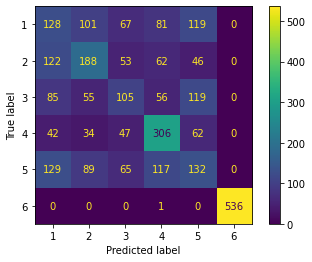

In [33]:
plot_confusion_matrix(clf, X_test, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [90]:
y_train
lista = []
for item in y_train[0]:
    if item == 5:
        lista.append(1)
    else:
        lista.append(0)

y_train['five'] = lista
y_train.head()

,0,five
0,5,1
1,5,1
2,5,1
3,5,1
4,5,1


In [91]:
clf = DecisionTreeClassifier(random_state=19, max_depth=4, min_samples_leaf=20).fit(X_train, y_train.five)
alphas = clf.feature_importances_
result = np.where(alphas > 0)
alphas[result]

array([0.0441802 , 0.32804818, 0.04654981, 0.02460683, 0.03365998,
       0.01179209, 0.02109163, 0.30185067, 0.004857  , 0.13043124,
       0.02018565, 0.03274672])

In [93]:
np.sort(alphas[result])

array([0.004857  , 0.01179209, 0.02018565, 0.02109163, 0.02460683,
       0.03274672, 0.03365998, 0.0441802 , 0.04654981, 0.13043124,
       0.30185067, 0.32804818])

In [94]:
result

(array([ 39,  42,  51,  54,  57, 133, 275, 297, 302, 411, 464, 562],
       dtype=int64),)

In [95]:
#42,297,411
features = pd.read_csv('features.txt', sep = ' ', header = None)

features.loc[features[0] == 41]

,0,1
40,41,tGravityAcc-mean()-X


In [96]:
features.loc[features[0] == 296]

,0,1
295,296,fBodyAcc-meanFreq()-Z


In [97]:
features.loc[features[0] == 410]

,0,1
409,410,"fBodyAccJerk-bandsEnergy()-1,8"


In [98]:
melhores = ['angle(X,gravityMean)', 'tGravityAccMag-arCoeff()4',
            'tGravityAcc-max()-Z', 'tGravityAcc-mean()-X', 'fBodyAcc-meanFreq()-Z','fBodyAccJerk-bandsEnergy()-1,8']

In [102]:
X = X_train[melhores]
y = y_train.drop(columns=['five'])

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [103]:
caminho = DecisionTreeClassifier(random_state=19, min_samples_leaf=20).cost_complexity_pruning_path(X, y)
ccp_alphas = caminho.ccp_alphas
ccp_alphas  = np.unique(ccp_alphas[ccp_alphas>=0])

In [104]:
clf = DecisionTreeClassifier(random_state = 19)

grid_parametros = {'ccp_alpha':ccp_alphas}

grid = GridSearchCV(estimator = clf,  param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X, y)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
[CV 1/10; 1/116] START ccp_alpha=0.0............................................
[CV 1/10; 1/116] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 2/10; 1/116] START ccp_alpha=0.0............................................
[CV 2/10; 1/116] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 3/10; 1/116] START ccp_alpha=0.0............................................
[CV 3/10; 1/116] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 4/10; 1/116] START ccp_alpha=0.0............................................
[CV 4/10; 1/116] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 5/10; 1/116] START ccp_alpha=0.0............................................
[CV 5/10; 1/116] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 6/10; 1/116] START ccp_alpha=0.0............................................
[CV 6/10; 1/116] END .......................

[CV 6/10; 6/116] END .......ccp_alpha=1.0068821276655799e-05; total time=   0.0s
[CV 7/10; 6/116] START ccp_alpha=1.0068821276655799e-05.........................
[CV 7/10; 6/116] END .......ccp_alpha=1.0068821276655799e-05; total time=   0.0s
[CV 8/10; 6/116] START ccp_alpha=1.0068821276655799e-05.........................
[CV 8/10; 6/116] END .......ccp_alpha=1.0068821276655799e-05; total time=   0.0s
[CV 9/10; 6/116] START ccp_alpha=1.0068821276655799e-05.........................
[CV 9/10; 6/116] END .......ccp_alpha=1.0068821276655799e-05; total time=   0.0s
[CV 10/10; 6/116] START ccp_alpha=1.0068821276655799e-05........................
[CV 10/10; 6/116] END ......ccp_alpha=1.0068821276655799e-05; total time=   0.0s
[CV 1/10; 7/116] START ccp_alpha=1.2905999794060813e-05.........................
[CV 1/10; 7/116] END .......ccp_alpha=1.2905999794060813e-05; total time=   0.0s
[CV 2/10; 7/116] START ccp_alpha=1.2905999794060813e-05.........................
[CV 2/10; 7/116] END .......

[CV 1/10; 12/116] END .......ccp_alpha=3.169078670549948e-05; total time=   0.0s
[CV 2/10; 12/116] START ccp_alpha=3.169078670549948e-05.........................
[CV 2/10; 12/116] END .......ccp_alpha=3.169078670549948e-05; total time=   0.0s
[CV 3/10; 12/116] START ccp_alpha=3.169078670549948e-05.........................
[CV 3/10; 12/116] END .......ccp_alpha=3.169078670549948e-05; total time=   0.0s
[CV 4/10; 12/116] START ccp_alpha=3.169078670549948e-05.........................
[CV 4/10; 12/116] END .......ccp_alpha=3.169078670549948e-05; total time=   0.0s
[CV 5/10; 12/116] START ccp_alpha=3.169078670549948e-05.........................
[CV 5/10; 12/116] END .......ccp_alpha=3.169078670549948e-05; total time=   0.0s
[CV 6/10; 12/116] START ccp_alpha=3.169078670549948e-05.........................
[CV 6/10; 12/116] END .......ccp_alpha=3.169078670549948e-05; total time=   0.0s
[CV 7/10; 12/116] START ccp_alpha=3.169078670549948e-05.........................
[CV 7/10; 12/116] END ......

[CV 3/10; 17/116] START ccp_alpha=4.960804102187083e-05.........................
[CV 3/10; 17/116] END .......ccp_alpha=4.960804102187083e-05; total time=   0.0s
[CV 4/10; 17/116] START ccp_alpha=4.960804102187083e-05.........................
[CV 4/10; 17/116] END .......ccp_alpha=4.960804102187083e-05; total time=   0.0s
[CV 5/10; 17/116] START ccp_alpha=4.960804102187083e-05.........................
[CV 5/10; 17/116] END .......ccp_alpha=4.960804102187083e-05; total time=   0.0s
[CV 6/10; 17/116] START ccp_alpha=4.960804102187083e-05.........................
[CV 6/10; 17/116] END .......ccp_alpha=4.960804102187083e-05; total time=   0.0s
[CV 7/10; 17/116] START ccp_alpha=4.960804102187083e-05.........................
[CV 7/10; 17/116] END .......ccp_alpha=4.960804102187083e-05; total time=   0.0s
[CV 8/10; 17/116] START ccp_alpha=4.960804102187083e-05.........................
[CV 8/10; 17/116] END .......ccp_alpha=4.960804102187083e-05; total time=   0.0s
[CV 9/10; 17/116] START ccp_

[CV 6/10; 22/116] END .......ccp_alpha=6.284147312263413e-05; total time=   0.0s
[CV 7/10; 22/116] START ccp_alpha=6.284147312263413e-05.........................
[CV 7/10; 22/116] END .......ccp_alpha=6.284147312263413e-05; total time=   0.0s
[CV 8/10; 22/116] START ccp_alpha=6.284147312263413e-05.........................
[CV 8/10; 22/116] END .......ccp_alpha=6.284147312263413e-05; total time=   0.0s
[CV 9/10; 22/116] START ccp_alpha=6.284147312263413e-05.........................
[CV 9/10; 22/116] END .......ccp_alpha=6.284147312263413e-05; total time=   0.0s
[CV 10/10; 22/116] START ccp_alpha=6.284147312263413e-05........................
[CV 10/10; 22/116] END ......ccp_alpha=6.284147312263413e-05; total time=   0.0s
[CV 1/10; 23/116] START ccp_alpha=6.800870511425457e-05.........................
[CV 1/10; 23/116] END .......ccp_alpha=6.800870511425457e-05; total time=   0.0s
[CV 2/10; 23/116] START ccp_alpha=6.800870511425457e-05.........................
[CV 2/10; 23/116] END ......

[CV 1/10; 28/116] END ......ccp_alpha=0.00010901039137481135; total time=   0.0s
[CV 2/10; 28/116] START ccp_alpha=0.00010901039137481135........................
[CV 2/10; 28/116] END ......ccp_alpha=0.00010901039137481135; total time=   0.0s
[CV 3/10; 28/116] START ccp_alpha=0.00010901039137481135........................
[CV 3/10; 28/116] END ......ccp_alpha=0.00010901039137481135; total time=   0.0s
[CV 4/10; 28/116] START ccp_alpha=0.00010901039137481135........................
[CV 4/10; 28/116] END ......ccp_alpha=0.00010901039137481135; total time=   0.0s
[CV 5/10; 28/116] START ccp_alpha=0.00010901039137481135........................
[CV 5/10; 28/116] END ......ccp_alpha=0.00010901039137481135; total time=   0.0s
[CV 6/10; 28/116] START ccp_alpha=0.00010901039137481135........................
[CV 6/10; 28/116] END ......ccp_alpha=0.00010901039137481135; total time=   0.0s
[CV 7/10; 28/116] START ccp_alpha=0.00010901039137481135........................
[CV 7/10; 28/116] END ......

[CV 3/10; 33/116] END ......ccp_alpha=0.00018253418688674397; total time=   0.0s
[CV 4/10; 33/116] START ccp_alpha=0.00018253418688674397........................
[CV 4/10; 33/116] END ......ccp_alpha=0.00018253418688674397; total time=   0.0s
[CV 5/10; 33/116] START ccp_alpha=0.00018253418688674397........................
[CV 5/10; 33/116] END ......ccp_alpha=0.00018253418688674397; total time=   0.0s
[CV 6/10; 33/116] START ccp_alpha=0.00018253418688674397........................
[CV 6/10; 33/116] END ......ccp_alpha=0.00018253418688674397; total time=   0.0s
[CV 7/10; 33/116] START ccp_alpha=0.00018253418688674397........................
[CV 7/10; 33/116] END ......ccp_alpha=0.00018253418688674397; total time=   0.0s
[CV 8/10; 33/116] START ccp_alpha=0.00018253418688674397........................
[CV 8/10; 33/116] END ......ccp_alpha=0.00018253418688674397; total time=   0.0s
[CV 9/10; 33/116] START ccp_alpha=0.00018253418688674397........................
[CV 9/10; 33/116] END ......

[CV 6/10; 38/116] END ......ccp_alpha=0.00025407132216622883; total time=   0.0s
[CV 7/10; 38/116] START ccp_alpha=0.00025407132216622883........................
[CV 7/10; 38/116] END ......ccp_alpha=0.00025407132216622883; total time=   0.0s
[CV 8/10; 38/116] START ccp_alpha=0.00025407132216622883........................
[CV 8/10; 38/116] END ......ccp_alpha=0.00025407132216622883; total time=   0.0s
[CV 9/10; 38/116] START ccp_alpha=0.00025407132216622883........................
[CV 9/10; 38/116] END ......ccp_alpha=0.00025407132216622883; total time=   0.0s
[CV 10/10; 38/116] START ccp_alpha=0.00025407132216622883.......................
[CV 10/10; 38/116] END .....ccp_alpha=0.00025407132216622883; total time=   0.0s
[CV 1/10; 39/116] START ccp_alpha=0.00026613594529765507........................
[CV 1/10; 39/116] END ......ccp_alpha=0.00026613594529765507; total time=   0.0s
[CV 2/10; 39/116] START ccp_alpha=0.00026613594529765507........................
[CV 2/10; 39/116] END ......

[CV 2/10; 44/116] END ......ccp_alpha=0.00032640720305884266; total time=   0.0s
[CV 3/10; 44/116] START ccp_alpha=0.00032640720305884266........................
[CV 3/10; 44/116] END ......ccp_alpha=0.00032640720305884266; total time=   0.0s
[CV 4/10; 44/116] START ccp_alpha=0.00032640720305884266........................
[CV 4/10; 44/116] END ......ccp_alpha=0.00032640720305884266; total time=   0.0s
[CV 5/10; 44/116] START ccp_alpha=0.00032640720305884266........................
[CV 5/10; 44/116] END ......ccp_alpha=0.00032640720305884266; total time=   0.0s
[CV 6/10; 44/116] START ccp_alpha=0.00032640720305884266........................
[CV 6/10; 44/116] END ......ccp_alpha=0.00032640720305884266; total time=   0.0s
[CV 7/10; 44/116] START ccp_alpha=0.00032640720305884266........................
[CV 7/10; 44/116] END ......ccp_alpha=0.00032640720305884266; total time=   0.0s
[CV 8/10; 44/116] START ccp_alpha=0.00032640720305884266........................
[CV 8/10; 44/116] END ......

[CV 6/10; 49/116] END .......ccp_alpha=0.0003871974265271562; total time=   0.0s
[CV 7/10; 49/116] START ccp_alpha=0.0003871974265271562.........................
[CV 7/10; 49/116] END .......ccp_alpha=0.0003871974265271562; total time=   0.0s
[CV 8/10; 49/116] START ccp_alpha=0.0003871974265271562.........................
[CV 8/10; 49/116] END .......ccp_alpha=0.0003871974265271562; total time=   0.0s
[CV 9/10; 49/116] START ccp_alpha=0.0003871974265271562.........................
[CV 9/10; 49/116] END .......ccp_alpha=0.0003871974265271562; total time=   0.0s
[CV 10/10; 49/116] START ccp_alpha=0.0003871974265271562........................
[CV 10/10; 49/116] END ......ccp_alpha=0.0003871974265271562; total time=   0.0s
[CV 1/10; 50/116] START ccp_alpha=0.0003968300217663183.........................
[CV 1/10; 50/116] END .......ccp_alpha=0.0003968300217663183; total time=   0.0s
[CV 2/10; 50/116] START ccp_alpha=0.0003968300217663183.........................
[CV 2/10; 50/116] END ......

[CV 9/10; 54/116] END .......ccp_alpha=0.0004415668611493133; total time=   0.0s
[CV 10/10; 54/116] START ccp_alpha=0.0004415668611493133........................
[CV 10/10; 54/116] END ......ccp_alpha=0.0004415668611493133; total time=   0.0s
[CV 1/10; 55/116] START ccp_alpha=0.000468141194176595..........................
[CV 1/10; 55/116] END ........ccp_alpha=0.000468141194176595; total time=   0.0s
[CV 2/10; 55/116] START ccp_alpha=0.000468141194176595..........................
[CV 2/10; 55/116] END ........ccp_alpha=0.000468141194176595; total time=   0.0s
[CV 3/10; 55/116] START ccp_alpha=0.000468141194176595..........................
[CV 3/10; 55/116] END ........ccp_alpha=0.000468141194176595; total time=   0.0s
[CV 4/10; 55/116] START ccp_alpha=0.000468141194176595..........................
[CV 4/10; 55/116] END ........ccp_alpha=0.000468141194176595; total time=   0.0s
[CV 5/10; 55/116] START ccp_alpha=0.000468141194176595..........................
[CV 5/10; 55/116] END ......

[CV 1/10; 60/116] END .......ccp_alpha=0.0005965253519506506; total time=   0.0s
[CV 2/10; 60/116] START ccp_alpha=0.0005965253519506506.........................
[CV 2/10; 60/116] END .......ccp_alpha=0.0005965253519506506; total time=   0.0s
[CV 3/10; 60/116] START ccp_alpha=0.0005965253519506506.........................
[CV 3/10; 60/116] END .......ccp_alpha=0.0005965253519506506; total time=   0.0s
[CV 4/10; 60/116] START ccp_alpha=0.0005965253519506506.........................
[CV 4/10; 60/116] END .......ccp_alpha=0.0005965253519506506; total time=   0.0s
[CV 5/10; 60/116] START ccp_alpha=0.0005965253519506506.........................
[CV 5/10; 60/116] END .......ccp_alpha=0.0005965253519506506; total time=   0.0s
[CV 6/10; 60/116] START ccp_alpha=0.0005965253519506506.........................
[CV 6/10; 60/116] END .......ccp_alpha=0.0005965253519506506; total time=   0.0s
[CV 7/10; 60/116] START ccp_alpha=0.0005965253519506506.........................
[CV 7/10; 60/116] END ......

[CV 2/10; 65/116] START ccp_alpha=0.0007765445589983516.........................
[CV 2/10; 65/116] END .......ccp_alpha=0.0007765445589983516; total time=   0.0s
[CV 3/10; 65/116] START ccp_alpha=0.0007765445589983516.........................
[CV 3/10; 65/116] END .......ccp_alpha=0.0007765445589983516; total time=   0.0s
[CV 4/10; 65/116] START ccp_alpha=0.0007765445589983516.........................
[CV 4/10; 65/116] END .......ccp_alpha=0.0007765445589983516; total time=   0.0s
[CV 5/10; 65/116] START ccp_alpha=0.0007765445589983516.........................
[CV 5/10; 65/116] END .......ccp_alpha=0.0007765445589983516; total time=   0.0s
[CV 6/10; 65/116] START ccp_alpha=0.0007765445589983516.........................
[CV 6/10; 65/116] END .......ccp_alpha=0.0007765445589983516; total time=   0.0s
[CV 7/10; 65/116] START ccp_alpha=0.0007765445589983516.........................
[CV 7/10; 65/116] END .......ccp_alpha=0.0007765445589983516; total time=   0.0s
[CV 8/10; 65/116] START ccp_

[CV 3/10; 70/116] END .......ccp_alpha=0.0008641813176352223; total time=   0.0s
[CV 4/10; 70/116] START ccp_alpha=0.0008641813176352223.........................
[CV 4/10; 70/116] END .......ccp_alpha=0.0008641813176352223; total time=   0.0s
[CV 5/10; 70/116] START ccp_alpha=0.0008641813176352223.........................
[CV 5/10; 70/116] END .......ccp_alpha=0.0008641813176352223; total time=   0.0s
[CV 6/10; 70/116] START ccp_alpha=0.0008641813176352223.........................
[CV 6/10; 70/116] END .......ccp_alpha=0.0008641813176352223; total time=   0.0s
[CV 7/10; 70/116] START ccp_alpha=0.0008641813176352223.........................
[CV 7/10; 70/116] END .......ccp_alpha=0.0008641813176352223; total time=   0.0s
[CV 8/10; 70/116] START ccp_alpha=0.0008641813176352223.........................
[CV 8/10; 70/116] END .......ccp_alpha=0.0008641813176352223; total time=   0.0s
[CV 9/10; 70/116] START ccp_alpha=0.0008641813176352223.........................
[CV 9/10; 70/116] END ......

[CV 6/10; 75/116] END .......ccp_alpha=0.0009714006925650017; total time=   0.0s
[CV 7/10; 75/116] START ccp_alpha=0.0009714006925650017.........................
[CV 7/10; 75/116] END .......ccp_alpha=0.0009714006925650017; total time=   0.0s
[CV 8/10; 75/116] START ccp_alpha=0.0009714006925650017.........................
[CV 8/10; 75/116] END .......ccp_alpha=0.0009714006925650017; total time=   0.0s
[CV 9/10; 75/116] START ccp_alpha=0.0009714006925650017.........................
[CV 9/10; 75/116] END .......ccp_alpha=0.0009714006925650017; total time=   0.0s
[CV 10/10; 75/116] START ccp_alpha=0.0009714006925650017........................
[CV 10/10; 75/116] END ......ccp_alpha=0.0009714006925650017; total time=   0.0s
[CV 1/10; 76/116] START ccp_alpha=0.0010494488843577334.........................
[CV 1/10; 76/116] END .......ccp_alpha=0.0010494488843577334; total time=   0.0s
[CV 2/10; 76/116] START ccp_alpha=0.0010494488843577334.........................
[CV 2/10; 76/116] END ......

[CV 8/10; 80/116] END .......ccp_alpha=0.0012684087062377674; total time=   0.0s
[CV 9/10; 80/116] START ccp_alpha=0.0012684087062377674.........................
[CV 9/10; 80/116] END .......ccp_alpha=0.0012684087062377674; total time=   0.0s
[CV 10/10; 80/116] START ccp_alpha=0.0012684087062377674........................
[CV 10/10; 80/116] END ......ccp_alpha=0.0012684087062377674; total time=   0.0s
[CV 1/10; 81/116] START ccp_alpha=0.0013194321795710808.........................
[CV 1/10; 81/116] END .......ccp_alpha=0.0013194321795710808; total time=   0.0s
[CV 2/10; 81/116] START ccp_alpha=0.0013194321795710808.........................
[CV 2/10; 81/116] END .......ccp_alpha=0.0013194321795710808; total time=   0.0s
[CV 3/10; 81/116] START ccp_alpha=0.0013194321795710808.........................
[CV 3/10; 81/116] END .......ccp_alpha=0.0013194321795710808; total time=   0.0s
[CV 4/10; 81/116] START ccp_alpha=0.0013194321795710808.........................
[CV 4/10; 81/116] END ......

[CV 3/10; 86/116] END .......ccp_alpha=0.0016699983751766335; total time=   0.0s
[CV 4/10; 86/116] START ccp_alpha=0.0016699983751766335.........................
[CV 4/10; 86/116] END .......ccp_alpha=0.0016699983751766335; total time=   0.0s
[CV 5/10; 86/116] START ccp_alpha=0.0016699983751766335.........................
[CV 5/10; 86/116] END .......ccp_alpha=0.0016699983751766335; total time=   0.0s
[CV 6/10; 86/116] START ccp_alpha=0.0016699983751766335.........................
[CV 6/10; 86/116] END .......ccp_alpha=0.0016699983751766335; total time=   0.0s
[CV 7/10; 86/116] START ccp_alpha=0.0016699983751766335.........................
[CV 7/10; 86/116] END .......ccp_alpha=0.0016699983751766335; total time=   0.0s
[CV 8/10; 86/116] START ccp_alpha=0.0016699983751766335.........................
[CV 8/10; 86/116] END .......ccp_alpha=0.0016699983751766335; total time=   0.0s
[CV 9/10; 86/116] START ccp_alpha=0.0016699983751766335.........................
[CV 9/10; 86/116] END ......

[CV 7/10; 91/116] START ccp_alpha=0.0021056882042813363.........................
[CV 7/10; 91/116] END .......ccp_alpha=0.0021056882042813363; total time=   0.0s
[CV 8/10; 91/116] START ccp_alpha=0.0021056882042813363.........................
[CV 8/10; 91/116] END .......ccp_alpha=0.0021056882042813363; total time=   0.0s
[CV 9/10; 91/116] START ccp_alpha=0.0021056882042813363.........................
[CV 9/10; 91/116] END .......ccp_alpha=0.0021056882042813363; total time=   0.0s
[CV 10/10; 91/116] START ccp_alpha=0.0021056882042813363........................
[CV 10/10; 91/116] END ......ccp_alpha=0.0021056882042813363; total time=   0.0s
[CV 1/10; 92/116] START ccp_alpha=0.002128072166470282..........................
[CV 1/10; 92/116] END ........ccp_alpha=0.002128072166470282; total time=   0.0s
[CV 2/10; 92/116] START ccp_alpha=0.002128072166470282..........................
[CV 2/10; 92/116] END ........ccp_alpha=0.002128072166470282; total time=   0.0s
[CV 3/10; 92/116] START ccp_

[CV 8/10; 96/116] END .......ccp_alpha=0.0026071075907181003; total time=   0.0s
[CV 9/10; 96/116] START ccp_alpha=0.0026071075907181003.........................
[CV 9/10; 96/116] END .......ccp_alpha=0.0026071075907181003; total time=   0.0s
[CV 10/10; 96/116] START ccp_alpha=0.0026071075907181003........................
[CV 10/10; 96/116] END ......ccp_alpha=0.0026071075907181003; total time=   0.0s
[CV 1/10; 97/116] START ccp_alpha=0.0026289747797539585.........................
[CV 1/10; 97/116] END .......ccp_alpha=0.0026289747797539585; total time=   0.0s
[CV 2/10; 97/116] START ccp_alpha=0.0026289747797539585.........................
[CV 2/10; 97/116] END .......ccp_alpha=0.0026289747797539585; total time=   0.0s
[CV 3/10; 97/116] START ccp_alpha=0.0026289747797539585.........................
[CV 3/10; 97/116] END .......ccp_alpha=0.0026289747797539585; total time=   0.0s
[CV 4/10; 97/116] START ccp_alpha=0.0026289747797539585.........................
[CV 4/10; 97/116] END ......

[CV 1/10; 102/116] END .......ccp_alpha=0.002909647538837268; total time=   0.0s
[CV 2/10; 102/116] START ccp_alpha=0.002909647538837268.........................
[CV 2/10; 102/116] END .......ccp_alpha=0.002909647538837268; total time=   0.0s
[CV 3/10; 102/116] START ccp_alpha=0.002909647538837268.........................
[CV 3/10; 102/116] END .......ccp_alpha=0.002909647538837268; total time=   0.0s
[CV 4/10; 102/116] START ccp_alpha=0.002909647538837268.........................
[CV 4/10; 102/116] END .......ccp_alpha=0.002909647538837268; total time=   0.0s
[CV 5/10; 102/116] START ccp_alpha=0.002909647538837268.........................
[CV 5/10; 102/116] END .......ccp_alpha=0.002909647538837268; total time=   0.0s
[CV 6/10; 102/116] START ccp_alpha=0.002909647538837268.........................
[CV 6/10; 102/116] END .......ccp_alpha=0.002909647538837268; total time=   0.0s
[CV 7/10; 102/116] START ccp_alpha=0.002909647538837268.........................
[CV 7/10; 102/116] END .....

[CV 6/10; 107/116] START ccp_alpha=0.005917490624373883.........................
[CV 6/10; 107/116] END .......ccp_alpha=0.005917490624373883; total time=   0.0s
[CV 7/10; 107/116] START ccp_alpha=0.005917490624373883.........................
[CV 7/10; 107/116] END .......ccp_alpha=0.005917490624373883; total time=   0.0s
[CV 8/10; 107/116] START ccp_alpha=0.005917490624373883.........................
[CV 8/10; 107/116] END .......ccp_alpha=0.005917490624373883; total time=   0.0s
[CV 9/10; 107/116] START ccp_alpha=0.005917490624373883.........................
[CV 9/10; 107/116] END .......ccp_alpha=0.005917490624373883; total time=   0.0s
[CV 10/10; 107/116] START ccp_alpha=0.005917490624373883........................
[CV 10/10; 107/116] END ......ccp_alpha=0.005917490624373883; total time=   0.0s
[CV 1/10; 108/116] START ccp_alpha=0.006419355010774709.........................
[CV 1/10; 108/116] END .......ccp_alpha=0.006419355010774709; total time=   0.0s
[CV 2/10; 108/116] START ccp

[CV 7/10; 112/116] END .......ccp_alpha=0.048265235290061714; total time=   0.0s
[CV 8/10; 112/116] START ccp_alpha=0.048265235290061714.........................
[CV 8/10; 112/116] END .......ccp_alpha=0.048265235290061714; total time=   0.0s
[CV 9/10; 112/116] START ccp_alpha=0.048265235290061714.........................
[CV 9/10; 112/116] END .......ccp_alpha=0.048265235290061714; total time=   0.0s
[CV 10/10; 112/116] START ccp_alpha=0.048265235290061714........................
[CV 10/10; 112/116] END ......ccp_alpha=0.048265235290061714; total time=   0.0s
[CV 1/10; 113/116] START ccp_alpha=0.052346142560883074.........................
[CV 1/10; 113/116] END .......ccp_alpha=0.052346142560883074; total time=   0.0s
[CV 2/10; 113/116] START ccp_alpha=0.052346142560883074.........................
[CV 2/10; 113/116] END .......ccp_alpha=0.052346142560883074; total time=   0.0s
[CV 3/10; 113/116] START ccp_alpha=0.052346142560883074.........................
[CV 3/10; 113/116] END .....

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=19),
             param_grid={'ccp_alpha': array([0.00000000e+00, 7.36876937e-06, 7.41913147e-06, 8.46900856e-06,
       8.56405916e-06, 1.00688213e-05, 1.29059998e-05, 2.43094946e-05,
       2.47920378e-05, 2.63593300e-05, 2.66001790e-05, 3.16907867e-05,
       3.34812087e-05, 3.82144153e-05, 4.16053255e-05, 4.52629365e-05,
       4.96080410...
       2.24797929e-03, 2.29176200e-03, 2.32180479e-03, 2.60710759e-03,
       2.62897478e-03, 2.63155119e-03, 2.69944536e-03, 2.74254555e-03,
       2.86816308e-03, 2.90964754e-03, 3.35687210e-03, 4.02105813e-03,
       4.56648571e-03, 4.63860168e-03, 5.91749062e-03, 6.41935501e-03,
       9.68031733e-03, 1.62784893e-02, 1.99034784e-02, 4.82652353e-02,
       5.23461426e-02, 6.52707437e-02, 1.67130588e-01, 1.85974665e-01])},
             verbose=100)

In [105]:
resultados = pd.DataFrame(grid.cv_results_)
best = resultados[resultados['rank_test_score'] == 1]
best

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
103,0.039286,0.002224,0.001711,0.000645,0.004021,{'ccp_alpha': 0.004021058129697497},0.85462,0.751359,0.802721,0.765986,0.855782,0.770068,0.727891,0.761905,0.912925,0.819048,0.80223,0.054988,1


In [106]:
X_test = X_test[melhores]

melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X, y)

In [107]:
clf.score(X_test, y_test)

0.7641669494401085

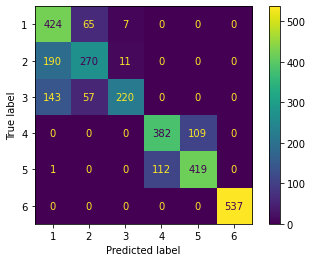

In [108]:
plot_confusion_matrix(clf, X_test, y_test);